In [1]:
import pandas as pd

pd.set_option("mode.copy_on_write", True)

df = pd.read_excel("../src/Prod_dataset.xlsx")

In [2]:
df.head()

,Data_Status,StateCode,MSN,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,2021F,AK,B1PRB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021F,AK,B1PRP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021F,AK,BDFDB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,27.0,29.0,15.0,0.0,0.0,0.0
3,2021F,AK,BDPRP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,5.0,5.0,3.0,0.0,0.0,0.0
4,2021F,AK,BFPRB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,27.0,29.0,15.0,0.0,0.0,0.0


In [3]:
df_melt = df.drop(columns=["Data_Status"]).melt(
    id_vars=["StateCode", "MSN"], var_name="Year", value_name="Value"
)
data = df_melt.pivot(index=["StateCode", "Year"], columns="MSN", values="Value")
data = data.reset_index()
data

MSN,StateCode,Year,B1PRB,B1PRP,BDFDB,BDPRP,BFPRB,BFPRP,BOPRB,BOPRP,...,REPRB,SOTCB,TEPRB,TETCB,WDEXB,WDPRB,WDTCB,WSTCB,WWPRB,WYTCB
0,AK,1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6800.0,0.0,21554.0,61433.0,0.0,3681.0,3681.0,0.0,3681.0,0.0
1,AK,1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7313.0,0.0,56144.0,72173.0,0.0,4145.0,4145.0,0.0,4145.0,0.0
2,AK,1962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7453.0,0.0,82748.0,78812.0,0.0,4246.0,4246.0,0.0,4246.0,0.0
3,AK,1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7793.0,0.0,87933.0,80788.0,0.0,4383.0,4383.0,0.0,4383.0,0.0
4,AK,1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8102.0,0.0,90198.0,85067.0,0.0,4728.0,4728.0,0.0,4728.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,X5,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3344,X5,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27811.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3345,X5,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3346,X5,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,26002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data["gas_ratio"] = data["NGMPB"] / data["TEPRB"]
data["Fuels_ratio"] = (data["CLPRB"] + data["NGMPB"] + data["PAPRB"]) / data["TEPRB"]
df = data[["StateCode", "Year", "Fuels_ratio", "gas_ratio"]]

df.rename(columns={"StateCode": "State"}, inplace=True)
df.reset_index(inplace=True)
# df.set_index("MSN", inplace=True)
df.head()

MSN,index,State,Year,Fuels_ratio,gas_ratio
0,0,AK,1960,0.684467,0.011506
1,1,AK,1961,0.869746,0.011346
2,2,AK,1962,0.909931,0.026647
3,3,AK,1963,0.911376,0.051642
4,4,AK,1964,0.910175,0.070201


#### Weighted ratio = 0.5 * gas_ratio + 0.5 * Fuels_ratio

In [5]:
df["weighted_ratio"] = df["gas_ratio"] * 0.5 + df["Fuels_ratio"] * 0.5
df.drop(columns=["index"], inplace=True)
df

MSN,State,Year,Fuels_ratio,gas_ratio,weighted_ratio
0,AK,1960,0.684467,0.011506,0.347986
1,AK,1961,0.869746,0.011346,0.440546
2,AK,1962,0.909931,0.026647,0.468289
3,AK,1963,0.911376,0.051642,0.481509
4,AK,1964,0.910175,0.070201,0.490188
...,...,...,...,...,...
3343,X5,2017,NaN,NaN,NaN
3344,X5,2018,NaN,NaN,NaN
3345,X5,2019,NaN,NaN,NaN
3346,X5,2020,NaN,NaN,NaN


In [6]:
df.columns

Index(['State', 'Year', 'Fuels_ratio', 'gas_ratio', 'weighted_ratio'], dtype='object', name='MSN')

In [7]:
import matplotlib.pyplot as plt


def plot_trend(data, year, treated, control, ratio="gas"):
    df_treated = data[
        (data["State"] == treated) & (data["Year"] >= year) & (data["Year"] <= 2009)
    ]
    df_control = data[
        (data["State"].isin(control)) & (data["Year"] >= year) & (data["Year"] <= 2009)
    ]

    control_grouped = df_control.groupby("Year")[f"{ratio}_ratio"].mean()

    if ratio == "gas":
        plt.plot(
            df_treated["Year"],
            df_treated["gas_ratio"],
            c="b",
            label=f"treated ({treated})",
        )
        plt.plot(
            control_grouped.index,
            control_grouped,
            c="r",
            label=f"control ({control})",
        )
        plt.xlabel("Year")
        plt.ylabel("Natural Gas Ratio")
        plt.title("State Natural Gas Ratio Trend")

    elif ratio == "Fuels":
        plt.plot(
            df_treated["Year"],
            df_treated["Fuels_ratio"],
            c="b",
            label=f"treated ({treated})",
        )
        plt.plot(
            control_grouped.index,
            control_grouped,
            c="r",
            label=f"control ({control})",
        )
        plt.xlabel("Year")
        plt.ylabel("Fossil Fuels Ratio")
        plt.title("State Fossil Fuels Ratio Trend")

    elif ratio == "weighted":
        plt.plot(
            df_treated["Year"],
            df_treated["weighted_ratio"],
            c="b",
            label=f"treated ({treated})",
        )
        plt.plot(
            control_grouped.index,
            control_grouped,
            c="r",
            label=f"control ({control})",
        )
        plt.xlabel("Year")
        plt.ylabel("Weighted Ratio")
        plt.title("Weighted Ratio Trend")

    plt.legend()
    plt.show()

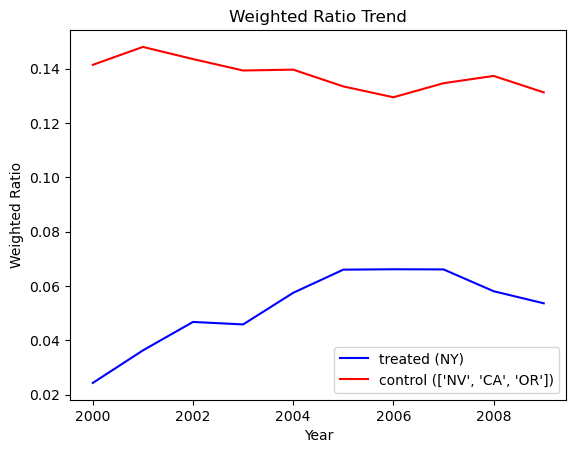

In [8]:
plot_trend(df, 2000, "NY", ["NV", "CA", "OR"], ratio="weighted")

In [9]:
states = [
    "AK",
    "AL",
    "AR",
    "AZ",
    "CA",
    "CO",
    "CT",
    "DC",
    "DE",
    "FL",
    "GA",
    "HI",
    "IA",
    "ID",
    "IL",
    "IN",
    "KS",
    "KY",
    "LA",
    "MA",
    "MD",
    "ME",
    "MI",
    "MN",
    "MO",
    "MS",
    "MT",
    "NC",
    "ND",
    "NE",
    "NH",
    "NJ",
    "NM",
    "NV",
    "NY",
    "OH",
    "OK",
    "OR",
    "PA",
    "RI",
    "SC",
    "SD",
    "TN",
    "TX",
    "UT",
    "VA",
    "VT",
    "WA",
    "WI",
    "WV",
    "WY",
]

joined_rggi = ["CT", "DE", "ME", "MD", "MA", "NH", "NY", "RI", "VT"]

non_rggi = [state for state in states if state not in joined_rggi]

In [10]:
states_with_zero_gas = df[df["gas_ratio"] == 0]["State"].unique()
states_with_zero_fuels = df[df["Fuels_ratio"] == 0]["State"].unique()
states_to_remove = set(states_with_zero_gas).union(set(states_with_zero_fuels))
new_rggi = [state for state in joined_rggi if state not in states_to_remove]

In [11]:
from itertools import combinations

comb_two_states = list(combinations(non_rggi, 2))
comb_three_states = list(combinations(non_rggi, 3))

control_2_3 = comb_two_states + comb_three_states
print("2 or 3 combinations:", control_2_3)
print("Length:", len(control_2_3))

2 or 3 combinations: [('AK', 'AL'), ('AK', 'AR'), ('AK', 'AZ'), ('AK', 'CA'), ('AK', 'CO'), ('AK', 'DC'), ('AK', 'FL'), ('AK', 'GA'), ('AK', 'HI'), ('AK', 'IA'), ('AK', 'ID'), ('AK', 'IL'), ('AK', 'IN'), ('AK', 'KS'), ('AK', 'KY'), ('AK', 'LA'), ('AK', 'MI'), ('AK', 'MN'), ('AK', 'MO'), ('AK', 'MS'), ('AK', 'MT'), ('AK', 'NC'), ('AK', 'ND'), ('AK', 'NE'), ('AK', 'NJ'), ('AK', 'NM'), ('AK', 'NV'), ('AK', 'OH'), ('AK', 'OK'), ('AK', 'OR'), ('AK', 'PA'), ('AK', 'SC'), ('AK', 'SD'), ('AK', 'TN'), ('AK', 'TX'), ('AK', 'UT'), ('AK', 'VA'), ('AK', 'WA'), ('AK', 'WI'), ('AK', 'WV'), ('AK', 'WY'), ('AL', 'AR'), ('AL', 'AZ'), ('AL', 'CA'), ('AL', 'CO'), ('AL', 'DC'), ('AL', 'FL'), ('AL', 'GA'), ('AL', 'HI'), ('AL', 'IA'), ('AL', 'ID'), ('AL', 'IL'), ('AL', 'IN'), ('AL', 'KS'), ('AL', 'KY'), ('AL', 'LA'), ('AL', 'MI'), ('AL', 'MN'), ('AL', 'MO'), ('AL', 'MS'), ('AL', 'MT'), ('AL', 'NC'), ('AL', 'ND'), ('AL', 'NE'), ('AL', 'NJ'), ('AL', 'NM'), ('AL', 'NV'), ('AL', 'OH'), ('AL', 'OK'), ('AL', 'OR')

In [12]:
def plot_trend_ax(data, year, treated, control, ratio="gas", ax=None):
    df_treated = data[
        (data["State"] == treated) & (data["Year"] >= year) & (data["Year"] <= 2009)
    ]
    df_control = data[
        (data["State"].isin(control)) & (data["Year"] >= year) & (data["Year"] <= 2009)
    ]
    control_grouped = df_control.groupby("Year")[f"{ratio}_ratio"].mean()

    if ratio == "gas":
        ax.plot(
            df_treated["Year"],
            df_treated["gas_ratio"],
            c="b",
            label=f"treated ({treated})",
        )
        ax.plot(
            control_grouped.index,
            control_grouped,
            c="r",
            label=f"control ({', '.join(control)})",
        )
        ax.set_xlabel("Year")
        ax.set_ylabel("Natural Gas Ratio")
        ax.set_title(f"Natural Gas Ratio Trend for {treated}")

    elif ratio == "Fuels":
        ax.plot(
            df_treated["Year"],
            df_treated["Fuels_ratio"],
            c="b",
            label=f"treated ({treated})",
        )
        ax.plot(
            control_grouped.index,
            control_grouped,
            c="r",
            label=f"control ({', '.join(control)})",
        )
        ax.set_xlabel("Year")
        ax.set_ylabel("Fossil Fuels Ratio")
        ax.set_title(f"Fossil Fuels Ratio Trend for {treated}")

    elif ratio == "weighted":
        ax.plot(
            df_treated["Year"],
            df_treated["weighted_ratio"],
            c="b",
            label=f"treated ({treated})",
        )
        ax.plot(
            control_grouped.index,
            control_grouped,
            c="r",
            label=f"control ({', '.join(control)})",
        )
        ax.set_xlabel("Year")
        ax.set_ylabel("Weighted Ratio")
        ax.set_title(f"Weighted Ratio Trend for {treated}")

    ax.legend()

In [13]:
# import random

# for state in joined_rggi:
#     for ratio in ["gas", "Fuels"]:
#         # Number of plots
#         num_plots = len(control_2_3)
#         # Determine the grid size
#         num_cols = 5  # Number of columns in the subplot grid
#         num_rows = (num_plots + num_cols - 1) // num_cols  # Compute rows needed

#         # Create a new figure with subplots
#         fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
#         fig.suptitle(f"{ratio} Ratio Trends for {state}", fontsize=16)

#         # Flatten the array of axes if needed
#         axs = axs.flatten()

#         # Loop through each control group and plot on a subplot
#         for i, control in enumerate(control_2_3):
#             # Use specific subplot (ax)
#             ax = axs[i]
#             plot_trend_ax(df, 2000, state, control, ratio=ratio, ax=ax)
#             ax.set_title(f'Control: {", ".join(control)}')

#         # Hide any unused axes if there are any
#         for j in range(i + 1, len(axs)):
#             fig.delaxes(axs[j])

#         plt.tight_layout()  # Adjust the layout to make room for the suptitle
#         plt.show()

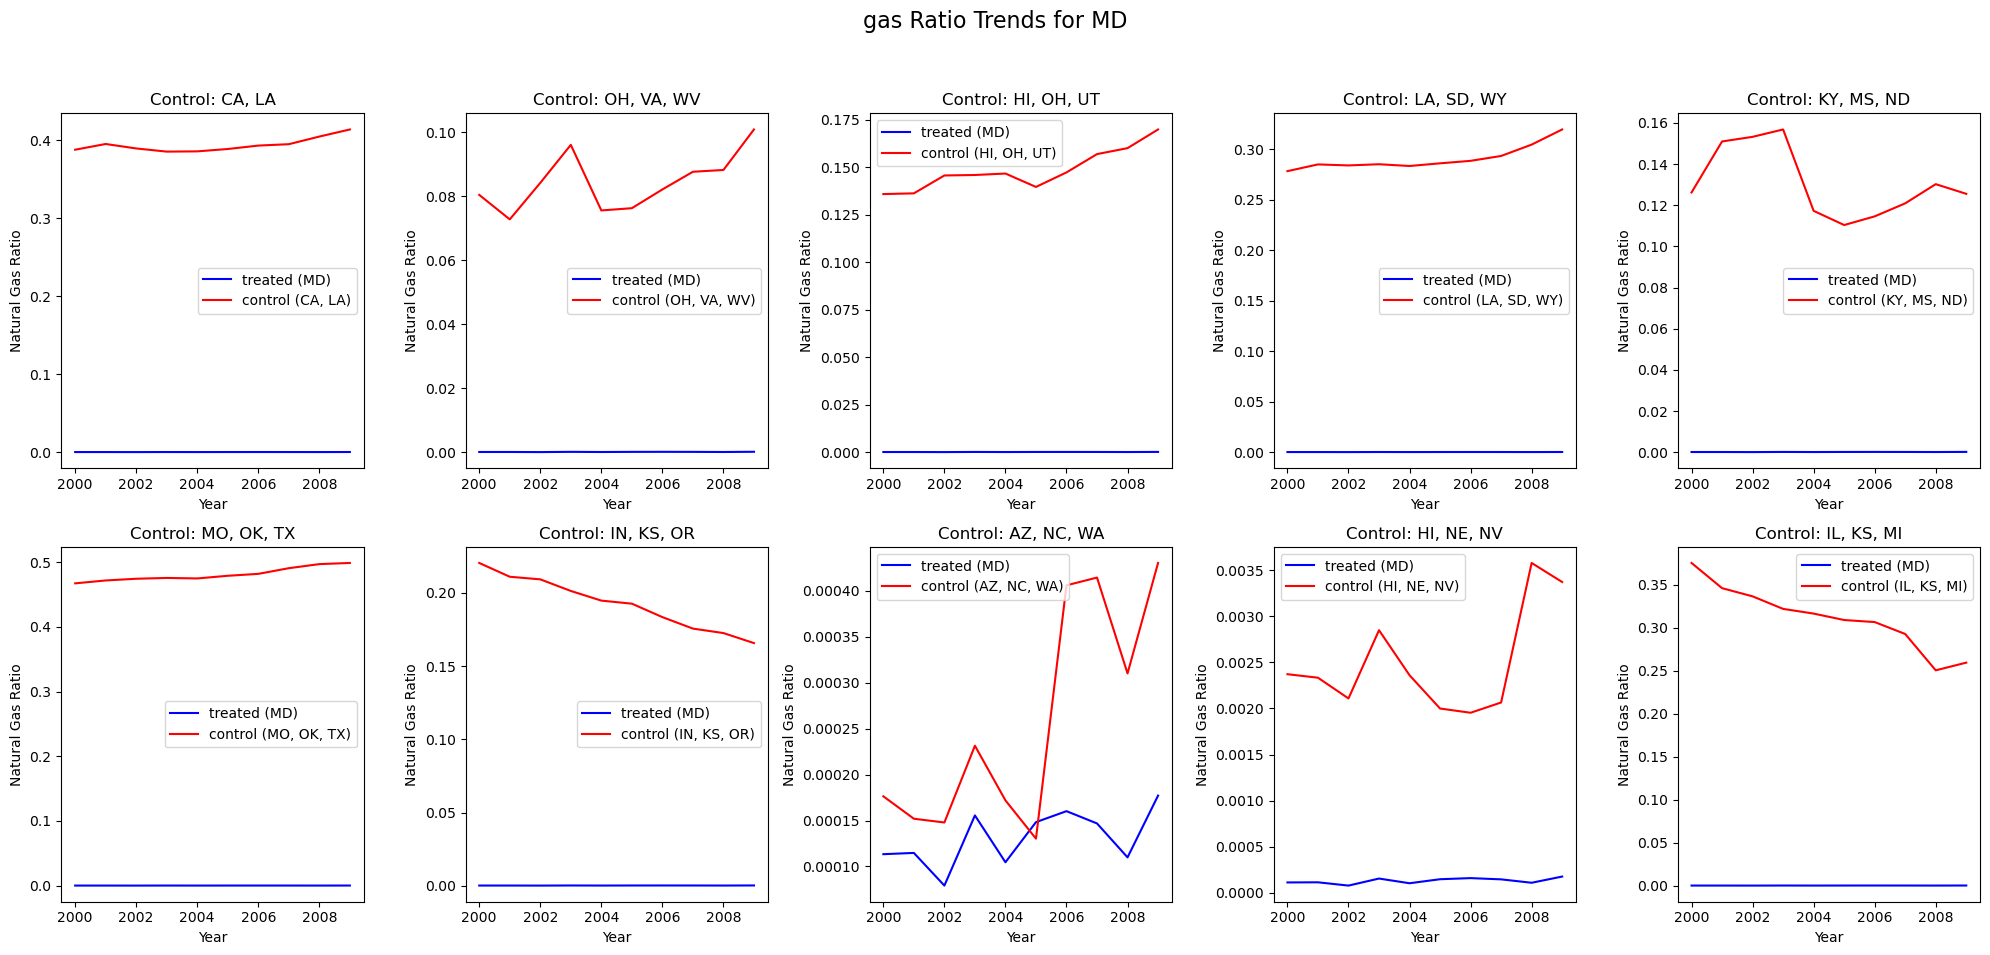

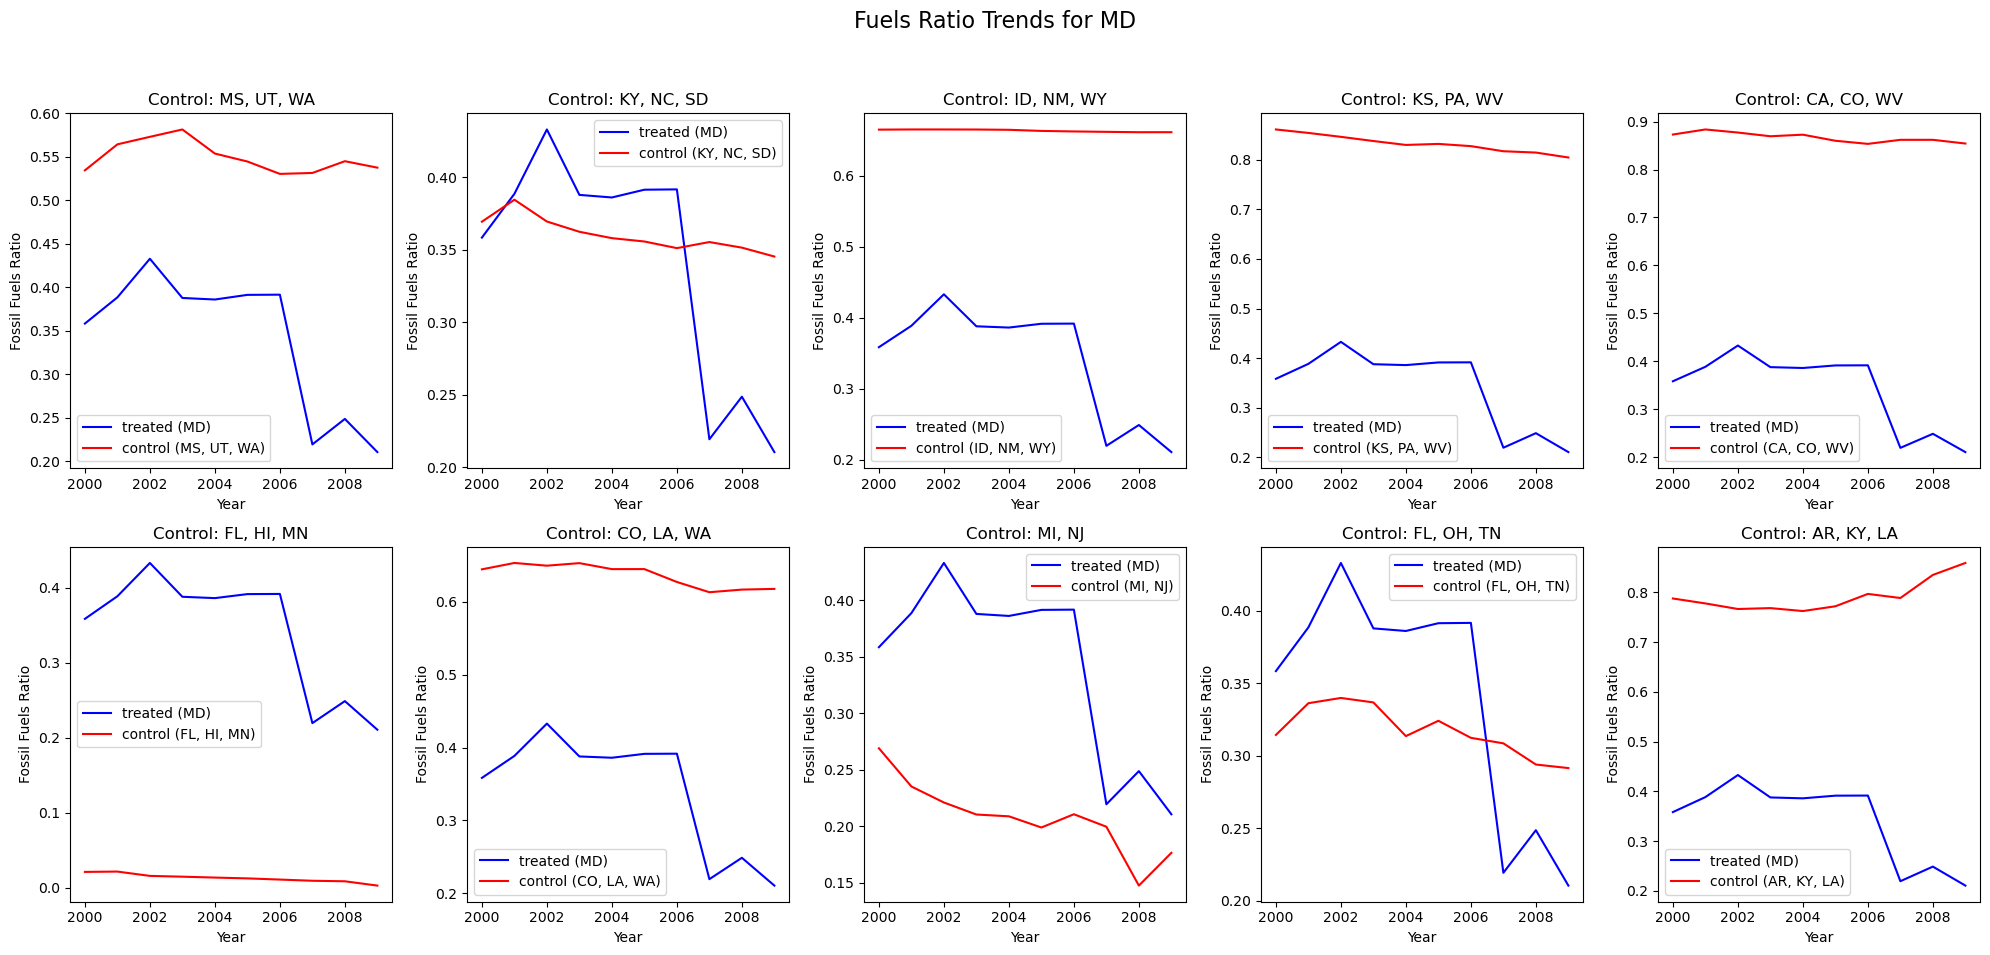

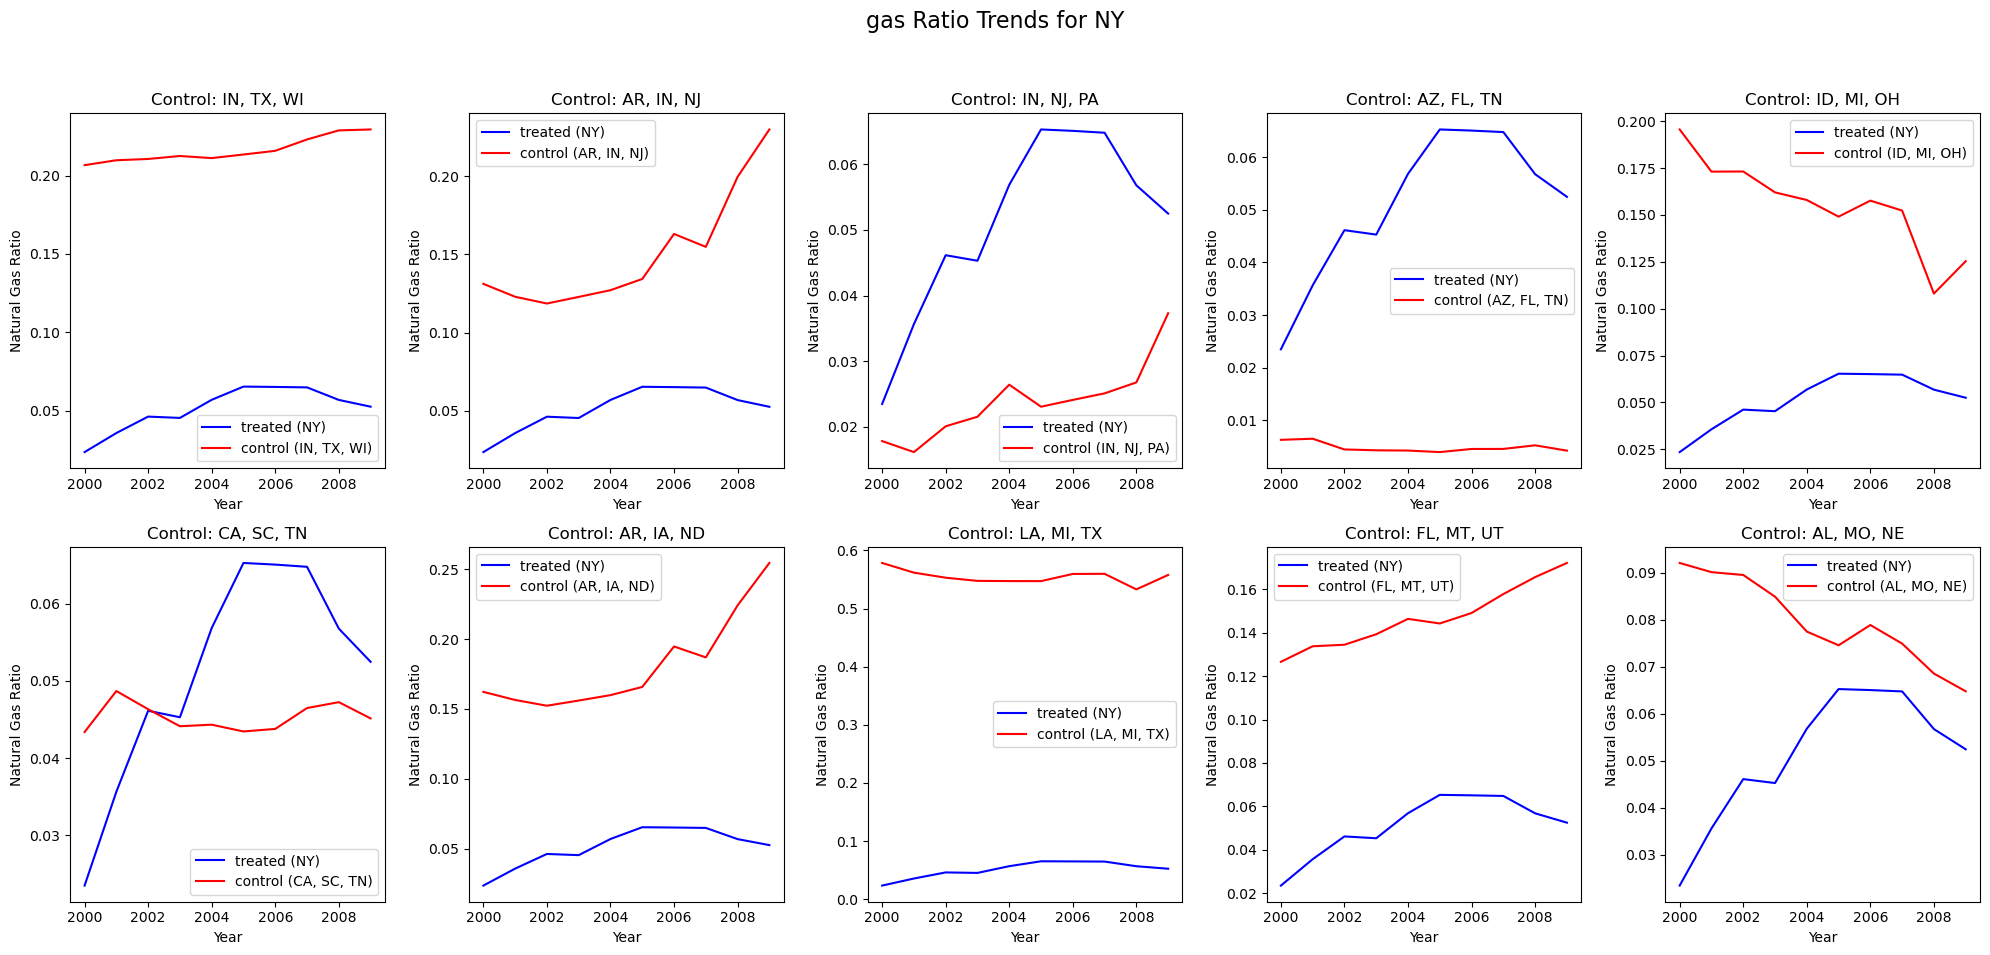

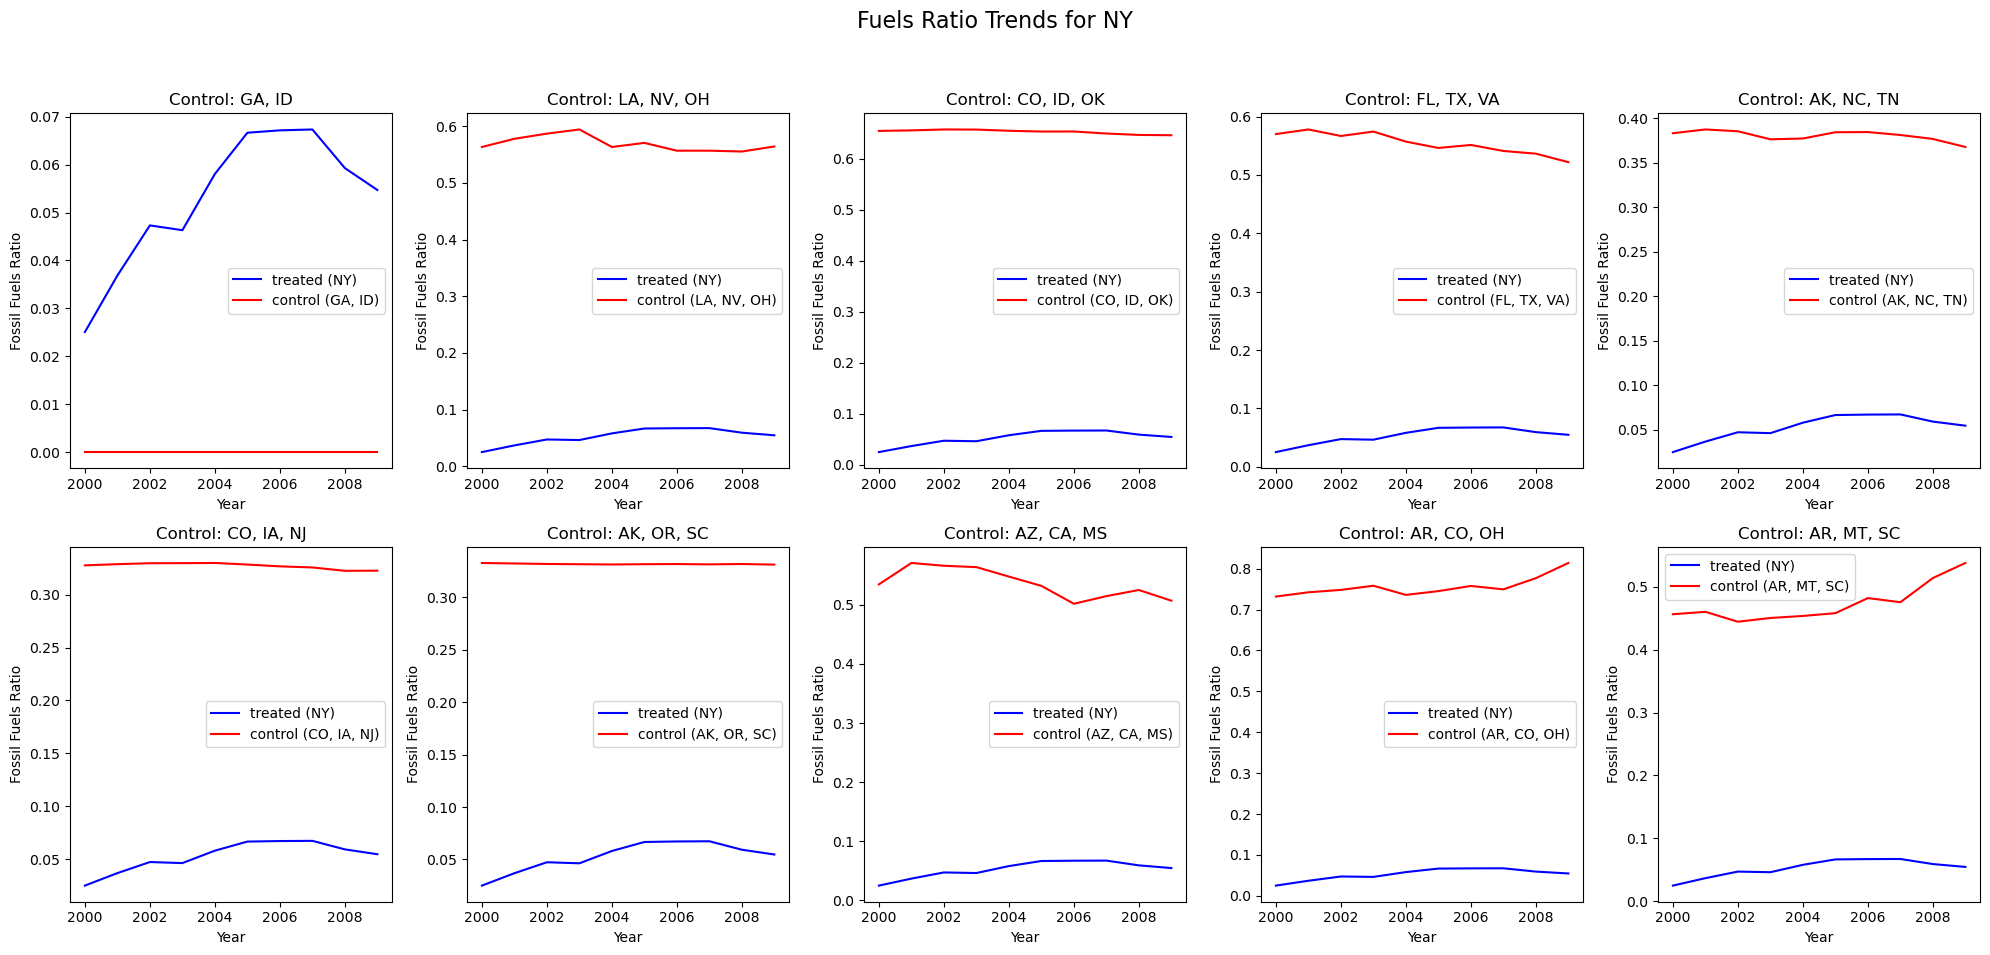

In [14]:
import random


for state in new_rggi:
    for ratio in ["gas", "Fuels"]:
        # randomly select 10 control to plot
        sampled_controls = random.sample(control_2_3, 10)

        num_cols = 5
        num_rows = 2

        fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
        fig.suptitle(f"{ratio} Ratio Trends for {state}", fontsize=16)

        axs = axs.flatten()

        for i, control in enumerate(sampled_controls):
            ax = axs[i]
            plot_trend_ax(df, 2000, state, control, ratio=ratio, ax=ax)
            ax.set_title(f'Control: {", ".join(control)}')

        for j in range(i + 1, len(axs)):
            fig.delaxes(axs[j])

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

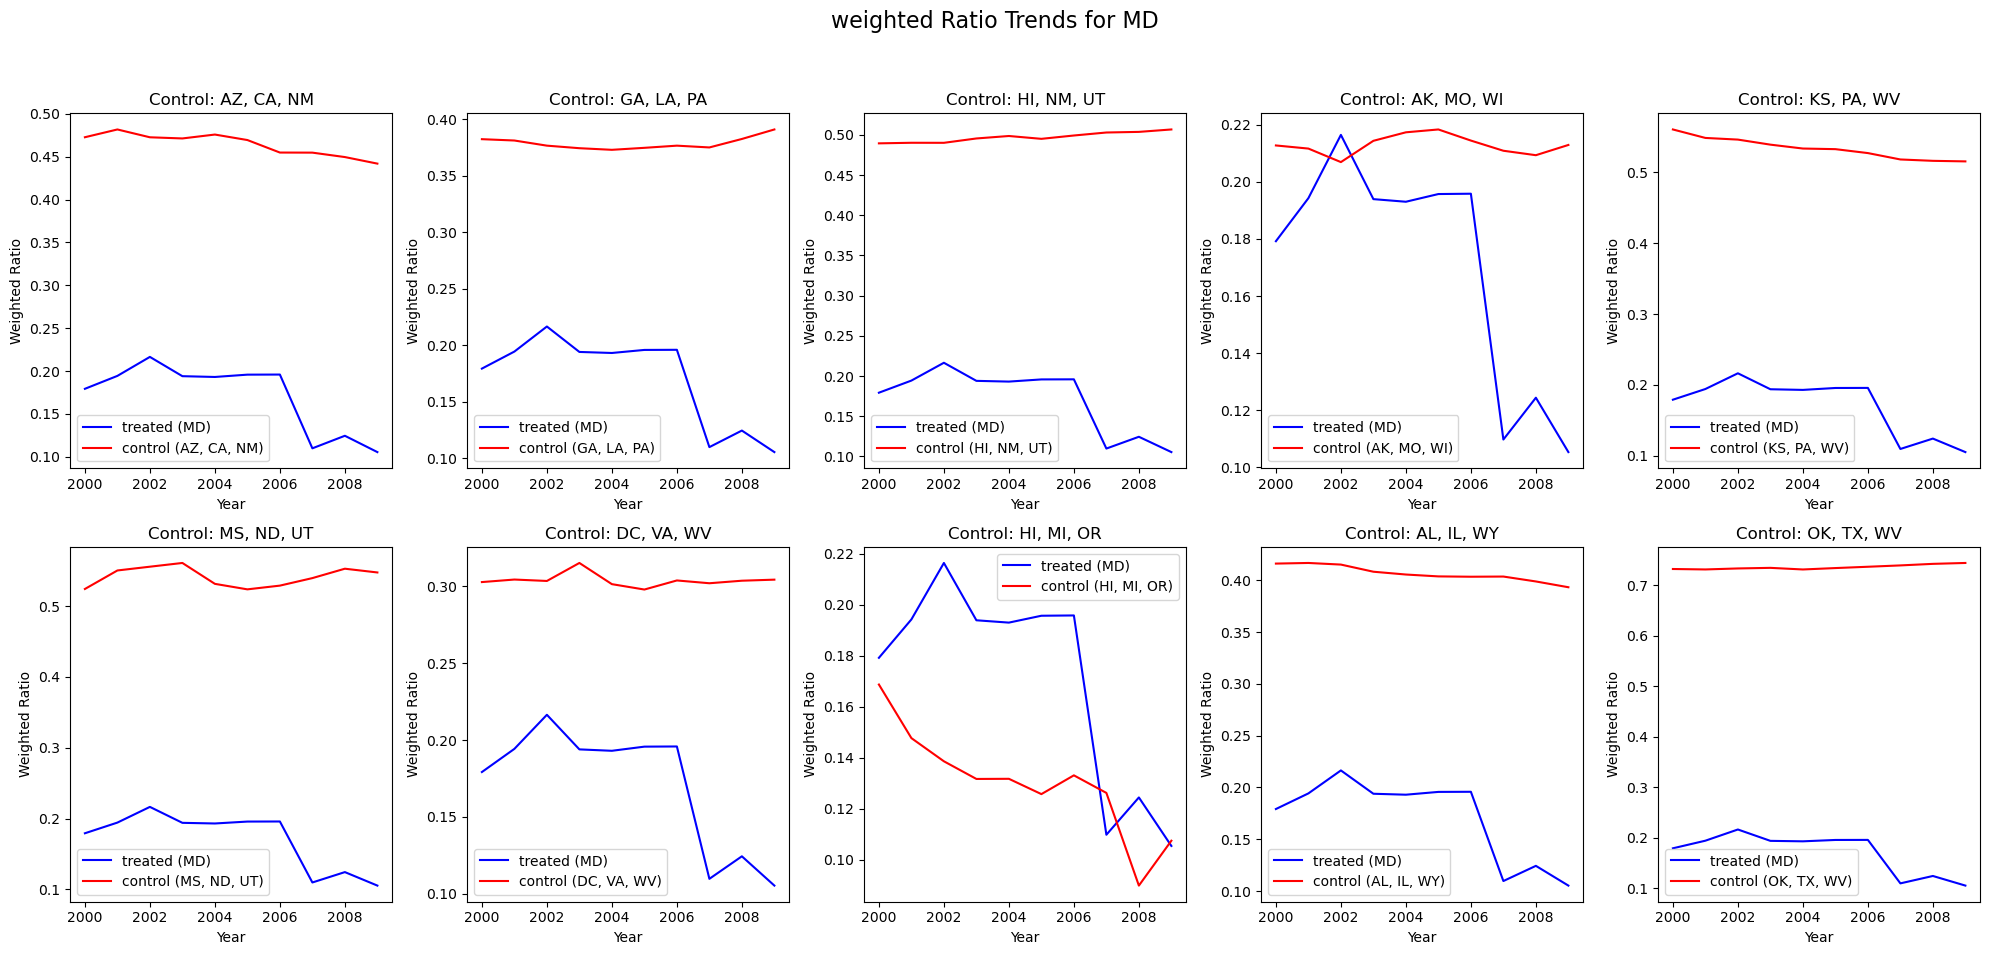

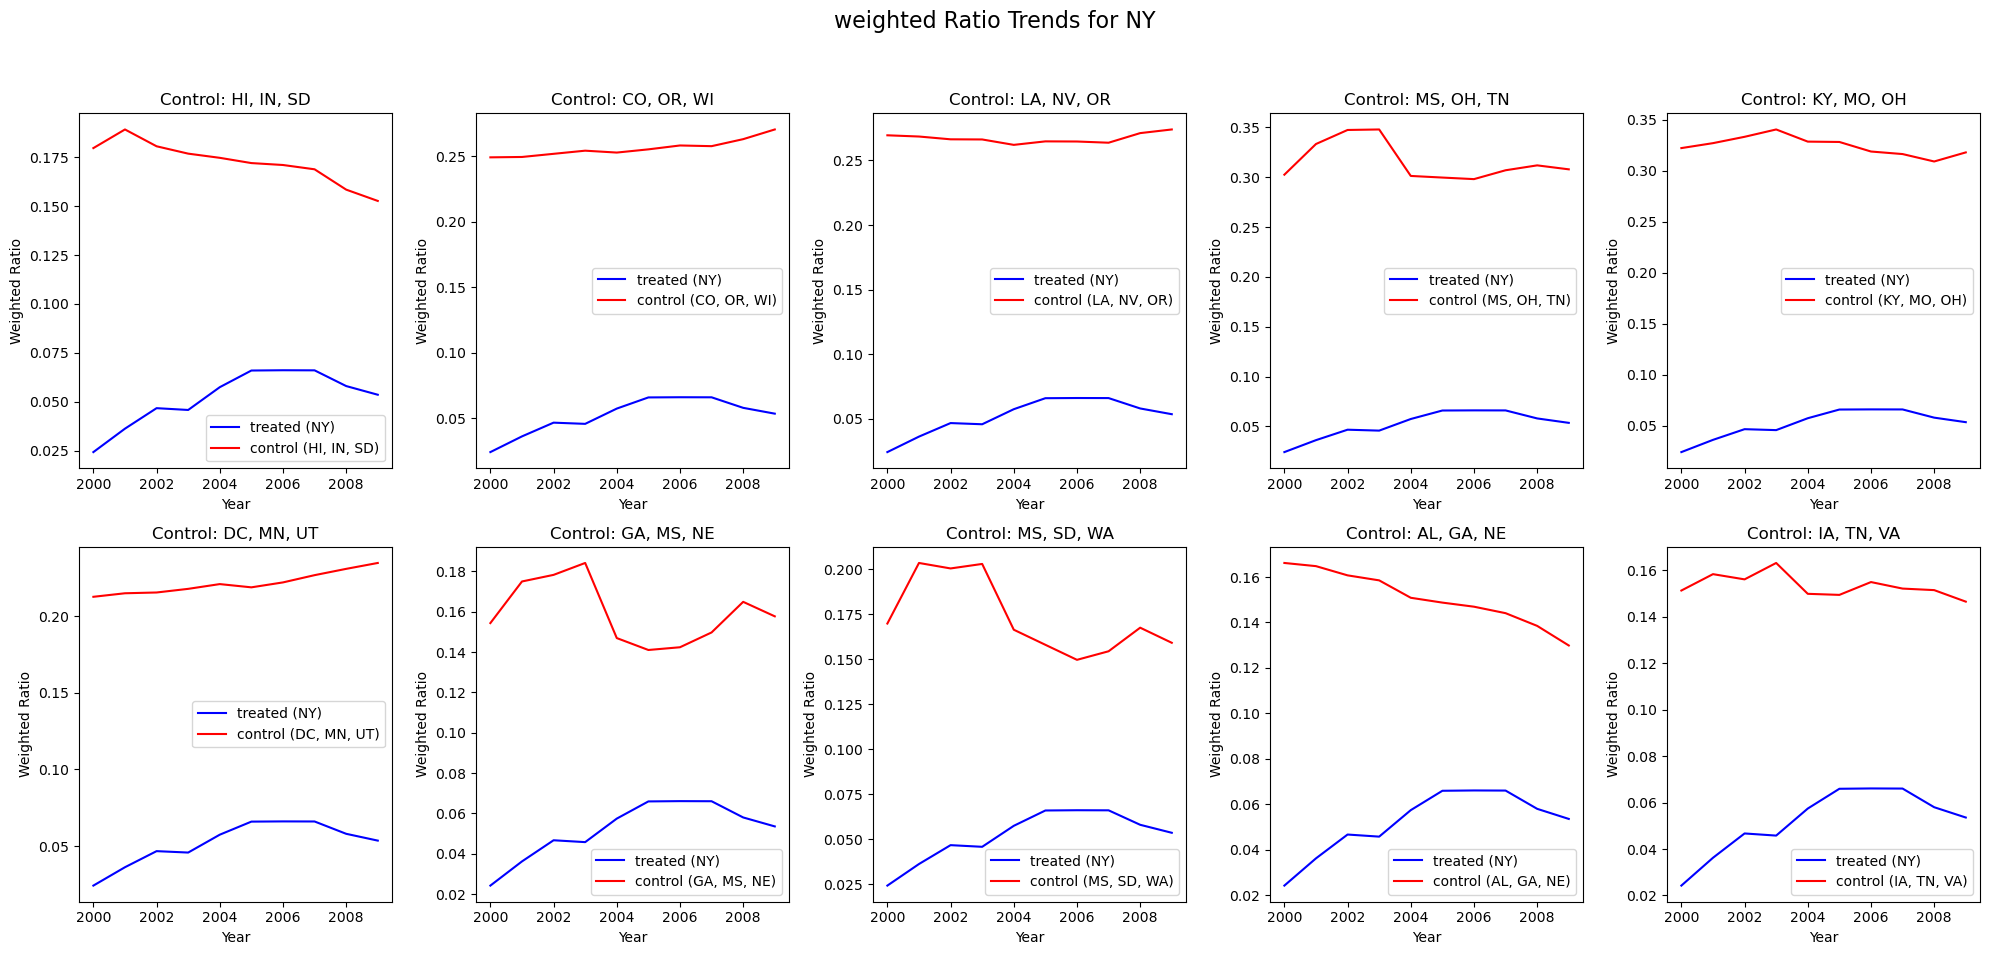

In [24]:
# weighted
for state in new_rggi:
    sampled_controls = random.sample(control_2_3, 10)
    # randomly select 10 control to plot
    num_cols = 5
    num_rows = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
    fig.suptitle(f"{'weighted'} Ratio Trends for {state}", fontsize=16)
    axs = axs.flatten()
    for i, control in enumerate(sampled_controls):
        ax = axs[i]
        plot_trend_ax(df, 2000, state, control, ratio="weighted", ax=ax)
        ax.set_title(f'Control: {", ".join(control)}')
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### Good ones from diff-in-diff

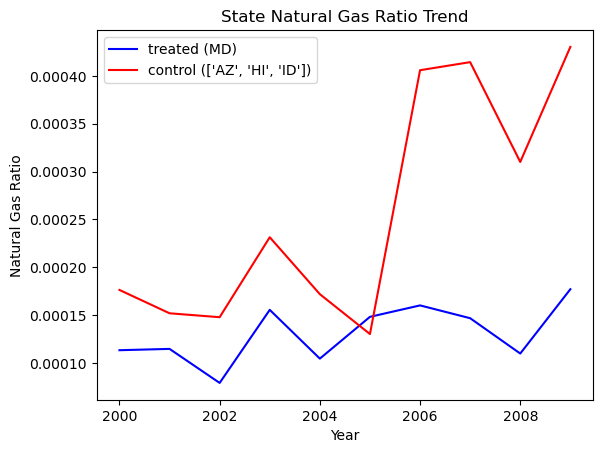

In [16]:
plot_trend(df, 2000, "MD", ["AZ", "HI", "ID"], ratio="gas")

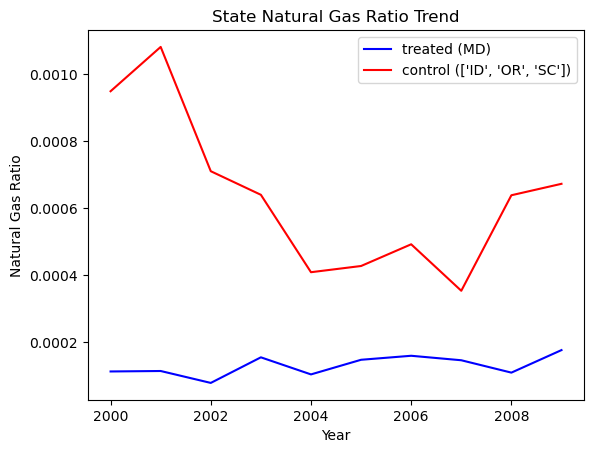

In [17]:
plot_trend(df, 2000, "MD", ["ID", "OR", "SC"], ratio="gas")

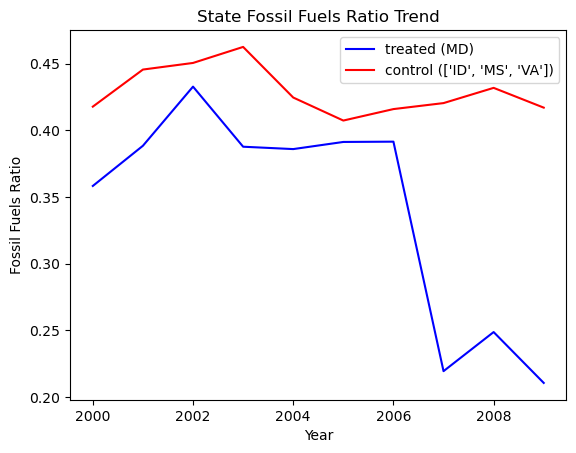

In [18]:
plot_trend(df, 2000, "MD", ["ID", "MS", "VA"], ratio="Fuels")

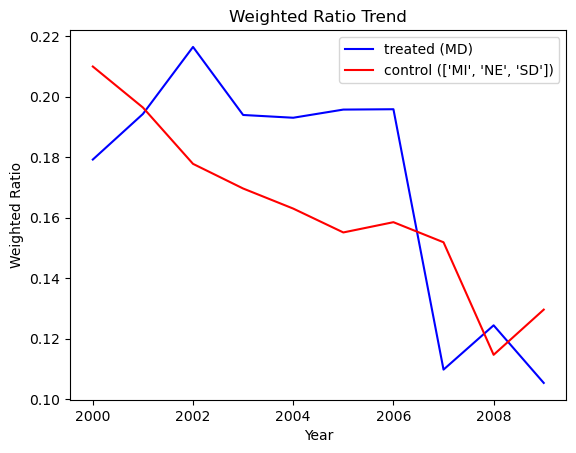

In [25]:
plot_trend(df, 2000, "MD", ["MI", "NE", "SD"], ratio="weighted")

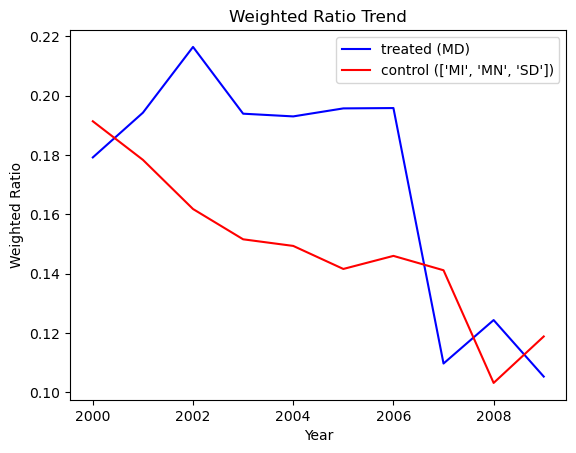

In [26]:
plot_trend(df, 2000, "MD", ["MI", "MN", "SD"], ratio="weighted")